<a href="https://colab.research.google.com/github/Foco22/BECAS_MAGISTER/blob/master/Te_damos_la_bienvenida_a_Colaboratory_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "camelot-py[cv]"

     |████████████████████████████████| 51kB 2.3MB/s 
     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 5.6MB 7.8MB/s 
     |████████████████████████████████| 2.6MB 46.6MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=d47aec69b2cb28c02caa50543ed0a68041f0b682e90cf56315f47e96718efd53
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [2]:
!apt install python3-tk ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 39 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 

In [3]:
import camelot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ***Exportacion y Preparacion de los datos***


In [135]:
df = extraccion_informacion_2019()
df

Saving RES_FALLO_MAG_7088_2019.pdf to RES_FALLO_MAG_7088_2019 (10).pdf


,INDICE,SEXO,ESTADO,PUNTAJE,INSTITUCION DE DESTINO,PERIODO
0,0,FEMENINO,FUERA DE BASES,NaN,UNIVERSIDAD DE BARCELONA,2019
1,1,FEMENINO,FUERA DE BASES,NaN,NEW YORK UNIVERSITY,2019
2,2,MASCULINO,FUERA DE BASES,NaN,KU LEUVEN (KATHOLIEKE UNIVERSITEIT LEUVEN),2019
3,3,FEMENINO,FUERA DE BASES,NaN,CAMPUS DOCENT SANT JOAN DE DEU ADSCRITO A LA U...,2019
4,4,MASCULINO,FUERA DE BASES,NaN,KINGS COLLEGE LONDON,2019
...,...,...,...,...,...,...
1270,1270,FEMENINO,SELECCIONADA,"4,620",UNIVERSITY OF CHICAGO,2019
1271,1271,FEMENINO,SELECCIONADA,"4,620",NEW YORK UNIVERSITY,2019
1272,1272,FEMENINO,SELECCIONADA,"4,619",MCGILL UNIVERSITY,2019
1273,1273,MASCULINO,SELECCIONADA,"4,619",UNIVERSITY OF QUEENSLAND,2019


In [134]:
def extraccion_informacion_2019():
    
    from google.colab import files
    uploaded = files.upload()  

    tables_1 = camelot.read_pdf('RES_FALLO_MAG_7088_2019.pdf', pages='1-33')
    tables_1.export('puntajes_mg_1.csv', f='csv', compress=True)


    conteo = 0
    lista_dataframes = []
    for x in tables_1:
        conteo = conteo +1 
        x.to_csv('pagina 20191 {}.csv'.format(conteo)) 
        lista_dataframes.append('pagina 20191 {}.csv'.format(conteo))
    df1 = pd.DataFrame()
    for file in lista_dataframes:
         df1 = pd.concat([df1, pd.read_csv(file)], ignore_index=True)

    df1 = df1[['FOLIO','INSTITUCION DE DESTINO']]

    tables_2 = camelot.read_pdf('RES_FALLO_MAG_7088_2019.pdf', pages='34-61')
    tables_2.export('puntajes_mg_2.csv', f='csv', compress=True)


    conteo = 0
    lista_dataframes = []
    for x in tables_2:
        conteo = conteo +1 
        x.to_csv('pagina 20192 {}.csv'.format(conteo)) 
        lista_dataframes.append('pagina 20192 {}.csv'.format(conteo))
    df2 = pd.DataFrame()
    for file in lista_dataframes:
         df2 = pd.concat([df2, pd.read_csv(file)], ignore_index=True)

    df = pd.merge(df2, df1, how='left', on=['FOLIO'])
   
    df.drop('Unnamed: 0', inplace = True, axis = 1)
    df.drop('Unnamed: 1', inplace = True, axis = 1)
    df.drop('FOLIO', inplace = True, axis = 1)
    df.drop('NOMBRE', inplace = True, axis = 1)
    df.drop('#', inplace = True, axis = 1)
    df.drop('INSTITUCION DE DESTINO_x', inplace = True, axis = 1)
    df = df.reset_index()
    df.rename(columns = {'index':'INDICE'}, inplace = True)
    df.rename(columns = {'INSTITUCION DE DESTINO_y':'INSTITUCION DE DESTINO'}, inplace = True)
    df['PERIODO'] = 2019

    return df

In [7]:
def extraccion_informacion_2018():

    from google.colab import files
    uploaded = files.upload()  

    tables = camelot.read_pdf('REX-7050-2018.pdf', pages='36-65')
    tables.export('puntajes_mg_2018.csv', f='csv', compress=True)
    conteo = 0
    lista_dataframes = []
    for x in tables:
        conteo = conteo +1 
        x.to_csv('pagina 2018 {}.csv'.format(conteo)) 
        lista_dataframes.append('pagina 2018 {}.csv'.format(conteo))
    df = pd.DataFrame()
    for file in lista_dataframes:
        df = pd.concat([df, pd.read_csv(file)], ignore_index=True)

    dff = df.fillna('')
    dff['FOLIO'] = dff['FOLIO'].astype(str)
    dff['llave'] = dff[['FOLIO', 'SEXO', 'NOMBRE']].agg(' '.join, axis=1)
    dff = dff['llave'].str.split(' ', expand=True)
    dff = dff.iloc[:,1:3]

    valores = 0
    for x in dff[1]:
        if (x != 'FEMENINO') and (x != 'MASCULINO'):
          dff.iloc[valores,0] = dff.iloc[valores,1]
        valores =  valores +1
        
    dff = dff[1]
    df = pd.concat([df, dff], axis=1, sort=False)
    df['ESTADO'] = df['ESTADO'].fillna('FUERA DE BASES')
    df.drop('Unnamed: 0', inplace = True, axis = 1)
    df.drop('Unnamed: 1', inplace = True, axis = 1)
    df.drop('#', inplace = True, axis = 1)
    df.drop('FOLIO', inplace = True, axis = 1)
    df.drop('SEXO', inplace = True, axis = 1)
    df.drop('NOMBRE', inplace = True, axis = 1)
    df.rename(columns = {1:'SEXO'}, inplace = True)
    df = df.reset_index()
    df.rename(columns = {'index':'INDICE'}, inplace = True)
    df['PERIODO'] = 2018
      
    return df

In [8]:
def extraccion_informacion_2017():

    from google.colab import files
    uploaded = files.upload()  

    tables = camelot.read_pdf('REX-6100_2017.pdf', pages='8-12')
    tables.export('puntajes_mg.csv', f='csv', compress=True)

    conteo = 0
    lista_dataframes = []
    for x in tables:
        conteo = conteo +1 
        x.to_csv('pagina 2017 {}.csv'.format(conteo)) 
        lista_dataframes.append('pagina 2017 {}.csv'.format(conteo))
    df = pd.DataFrame()
    for file in lista_dataframes:
         df = pd.concat([df, pd.read_csv(file)], ignore_index=True)

    df.drop('Unnamed: 0', inplace = True, axis = 1)
    df.drop('Unnamed: 1', inplace = True, axis = 1)
    df.drop('FOLIO', inplace = True, axis = 1)
    df.drop('NOMBRE', inplace = True, axis = 1)
    df.drop('#', inplace = True, axis = 1)
    df = df.reset_index()
    df.rename(columns = {'index':'INDICE'}, inplace = True)
    df['SEXO'] = df['SEXO'].str.split(' ', expand=True)[0]
    df['PERIODO'] = 2017

    return df

In [138]:
df_2019 = df

In [9]:
df_2017 = extraccion_informacion_2017()
df_2018 = extraccion_informacion_2018()
df_2019 = extraccion_informacion_2019()

Saving REX-6100_2017.pdf to REX-6100_2017.pdf


Saving REX-7050-2018.pdf to REX-7050-2018.pdf


Saving RES_FALLO_MAG_7088_2019.pdf to RES_FALLO_MAG_7088_2019 (1).pdf


In [140]:

df_2017 = df_2017[['INDICE', 'SEXO', 'INSTITUCIÓN DE DESTINO', 'ESTADO', 'PUNTAJE', 'PERIODO']]
df_2018 = df_2018[['INDICE', 'SEXO', 'INSTITUCIÓN DE DESTINO', 'ESTADO', 'PUNTAJE', 'PERIODO']]
df_2019.rename(columns = {'INSTITUCION DE DESTINO':'INSTITUCIÓN DE DESTINO'}, inplace = True)
df_2019 = df_2019[['INDICE', 'SEXO', 'INSTITUCIÓN DE DESTINO', 'ESTADO', 'PUNTAJE', 'PERIODO']]
frames = [df_2017, df_2018, df_2019]
df = pd.concat(frames)

In [141]:
df = df.reset_index()
df.drop('INDICE', inplace = True, axis = 1)
df.rename(columns = {'index':'INDICE'}, inplace = True)

In [142]:
df.head()

,INDICE,SEXO,INSTITUCIÓN DE DESTINO,ESTADO,PUNTAJE,PERIODO
0,0,FEMENINO,UNIVERSIDAD AUTONOMA DE BARCELONA,FUERA DE BASES,NaN,2017
1,1,FEMENINO,UNIVERSITY OF AUCKLAND,FUERA DE BASES,NaN,2017
2,2,MASCULINO,UNIVERSIDAD AUTONOMA DE BARCELONA,FUERA DE BASES,NaN,2017
3,3,FEMENINO,UNIVERSITY OF BIRMINGHAM,FUERA DE BASES,NaN,2017
4,4,FEMENINO,UNIVERSITY COLLEGE LONDON,FUERA DE BASES,NaN,2017


In [143]:
conteo= 0
for i in df['ESTADO']: 
    if i == 'NO SELECCIONADO':
        df.iloc[conteo,3] = 'NO SELECCIONADA'
    elif  i == 'SELECCIONADO':
        df.iloc[conteo,3] = 'SELECCIONADA'
    conteo =  conteo + 1

In [144]:
df

,INDICE,SEXO,INSTITUCIÓN DE DESTINO,ESTADO,PUNTAJE,PERIODO
0,0,FEMENINO,UNIVERSIDAD AUTONOMA DE BARCELONA,FUERA DE BASES,NaN,2017
1,1,FEMENINO,UNIVERSITY OF AUCKLAND,FUERA DE BASES,NaN,2017
2,2,MASCULINO,UNIVERSIDAD AUTONOMA DE BARCELONA,FUERA DE BASES,NaN,2017
3,3,FEMENINO,UNIVERSITY OF BIRMINGHAM,FUERA DE BASES,NaN,2017
4,4,FEMENINO,UNIVERSITY COLLEGE LONDON,FUERA DE BASES,NaN,2017
...,...,...,...,...,...,...
2913,1270,FEMENINO,UNIVERSITY OF CHICAGO,SELECCIONADA,"4,620",2019
2914,1271,FEMENINO,NEW YORK UNIVERSITY,SELECCIONADA,"4,620",2019
2915,1272,FEMENINO,MCGILL UNIVERSITY,SELECCIONADA,"4,619",2019
2916,1273,MASCULINO,UNIVERSITY OF QUEENSLAND,SELECCIONADA,"4,619",2019


# ***Analisis y Exploracion de los datos***



In [145]:
df_datos = df
df_datos.head()

,INDICE,SEXO,INSTITUCIÓN DE DESTINO,ESTADO,PUNTAJE,PERIODO
0,0,FEMENINO,UNIVERSIDAD AUTONOMA DE BARCELONA,FUERA DE BASES,NaN,2017
1,1,FEMENINO,UNIVERSITY OF AUCKLAND,FUERA DE BASES,NaN,2017
2,2,MASCULINO,UNIVERSIDAD AUTONOMA DE BARCELONA,FUERA DE BASES,NaN,2017
3,3,FEMENINO,UNIVERSITY OF BIRMINGHAM,FUERA DE BASES,NaN,2017
4,4,FEMENINO,UNIVERSITY COLLEGE LONDON,FUERA DE BASES,NaN,2017


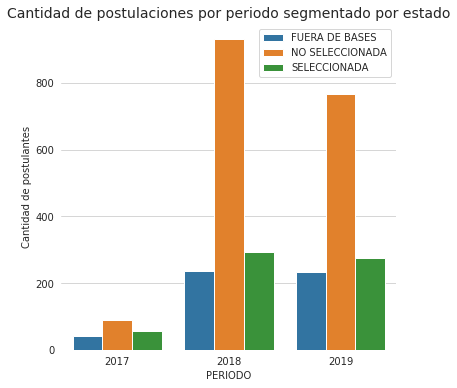

In [146]:
plt.figure(figsize=(6,6))
sns.set_color_codes("muted")

sns.set_style('whitegrid')
#g = sns.barplot(y="INDICE", x="ESTADO", data=df_datos.groupby('ESTADO').count()['INDICE'].reset_index(),
#            label="SELECCIONADA", color="b")
sns.countplot(x = 'PERIODO', data = df_datos, hue = 'ESTADO')
plt.title('Cantidad de postulaciones por periodo segmentado por estado', fontsize = 14)
plt.ylabel('Cantidad de postulantes')
plt.legend()
sns.despine(left=True, bottom=True)

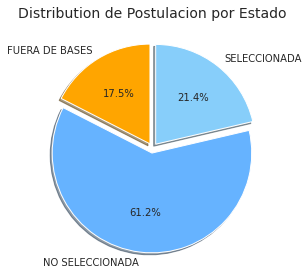

In [147]:
# Pie chart
labels = list(df_datos.groupby('ESTADO').count()['INDICE'].index)
sizes = list(df_datos.groupby('ESTADO').count()['INDICE'].values)
#colors
colors = ['orange','#66b3ff','lightskyblue']
#explsion
explode = (0.05,0.05,0.05)
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution de Postulacion por Estado', fontsize = 14)
plt.tight_layout()
plt.show()


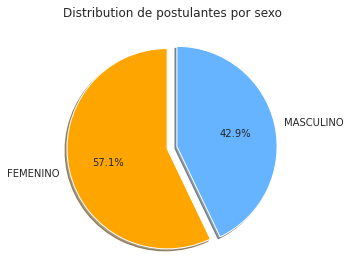

In [148]:
# Pie chart
labels = list(df_datos.groupby('SEXO').count()['INDICE'].index)
sizes = list(df_datos.groupby('SEXO').count()['INDICE'].values)
#colors
colors = ['orange','#66b3ff']
#explsion
explode = (0.05,0.05)
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution de postulantes por sexo')
plt.tight_layout()
plt.show()

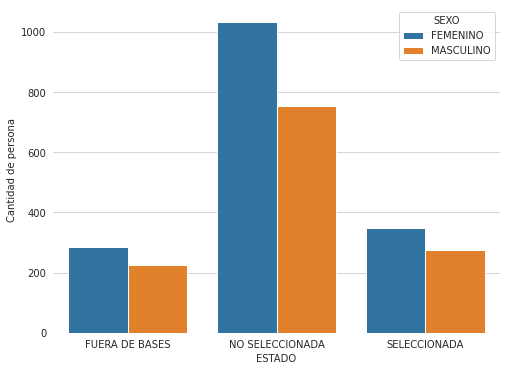

In [149]:
plt.figure(figsize=(8,6))

sns.set_style('whitegrid')
sns.countplot(x= 'ESTADO', data = df_datos, hue = 'SEXO')
plt.ylabel('Cantidad de persona')
sns.despine(left=True, bottom=True)

De aqui en adelante, solo se analizara la informacion de los seleccionados y no seleccionados, por lo que se filtrara la base por este subconjunto para el posterior analisis.


In [ ]:
#df_datos = df_datos.loc[df_datos['ESTADO'] != 'FUERA DE BASES']
#df_datos.head()

,#,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,PUNTAJE
234,1.0,73200636.0,FEMENINO,DELANO BAUDET PIA ALEJANDRA,NO SELECCIONADA,BOSTON UNIVERSITY,"4,618"
235,2.0,73200185.0,FEMENINO,ANDRADE SEPULVEDA KAREEN NICOLE,NO SELECCIONADA,UNIVERSIDADE DE SAO PAULO,"4,617"
236,3.0,73200547.0,FEMENINO,PEREZ PAREDES DANIELA ALEJANDRA,NO SELECCIONADA,UNIVERSITY OF MELBOURNE,"4,615"
237,4.0,73200569.0,MASCULINO,CARMONA FONATINE PEDRO LEON,NO SELECCIONADA,UNIVERSITY OF EDINBURGH,"4,614"
238,5.0,73200040.0,FEMENINO,YAÑEZ TORRES MARIA FLORENCIA,NO SELECCIONADA,UNIVERSITY OF SYDNEY,"4,614"


In [150]:
dummies = pd.get_dummies(df_datos['ESTADO'])
df_datos = pd.concat([df_datos, dummies], axis=1, sort=False)


In [152]:
df_datos.head()

df_datos.isnull().sum()

INDICE                      0
SEXO                        0
INSTITUCIÓN DE DESTINO      0
ESTADO                      0
PUNTAJE                   510
PERIODO                     0
FUERA DE BASES              0
NO SELECCIONADA             0
SELECCIONADA                0
dtype: int64

# ***Revision por Universidades***


En esta seccion, se realizara un analisis por universidad de las postulaciones en Chile. Uno de los puntos importantes que quiero investigar es saber si hay universidades mas propensas a aceptar a mas postulantes que otros.  Espero poder obtener algunas resultados en esta linea de analisis




In [153]:
def universidades_populares(n):
       
       #Tabla pivot
       pivot = df_datos.pivot_table(index=['INSTITUCIÓN DE DESTINO'], values=['NO SELECCIONADA', 'SELECCIONADA', 'FUERA DE BASES'], aggfunc='sum')
       pivot['POSTULACIONES'] = pivot['NO SELECCIONADA'] +pivot['SELECCIONADA'] + pivot['FUERA DE BASES']
       pivot = pivot.sort_values(by='POSTULACIONES', ascending=False)  
       pivot['Tasa de Aceptacion'] = round(pivot['SELECCIONADA']/pivot['POSTULACIONES'],3)*100
       pivot = pivot.reset_index()
       
       pivot_n = pivot[:n+1]

       #Grafico
       f, ax = plt.subplots(figsize=(10, 10))
       sns.set_color_codes("pastel")
       
       g = sns.barplot(y='INSTITUCIÓN DE DESTINO', x="POSTULACIONES", data=pivot_n,
            label="POSTULACIONES", color="b")
       
       sns.set_color_codes("muted")
       g = sns.barplot(y="INSTITUCIÓN DE DESTINO", x="SELECCIONADA", data=pivot_n,
            label="SELECCIONADA", color="b")

       
       # Agregar labels
       ax.legend(ncol=2, loc="lower right", frameon=True)
       
       plt.title('Radiografia de los {} universidades mas solicitadas en las postulaciones de BECAS'.format(n))
       plt.xticks(rotation=90)

       sns.despine(left=True, bottom=True)  

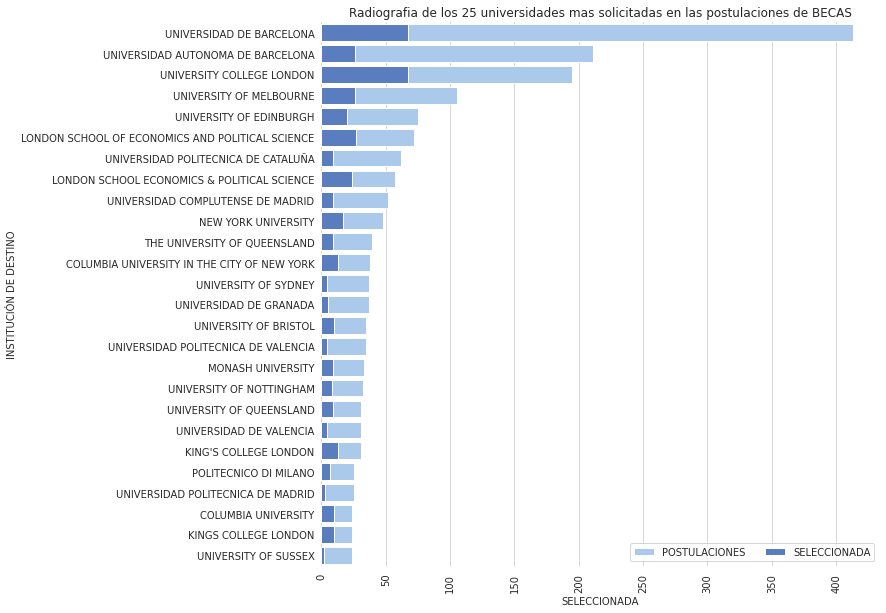

In [154]:
universidades_populares(25)  

In [155]:
def universidades_populares(n):
       
       import plotly.express as px

       #Tabla pivot
       pivot = df_datos.pivot_table(index=['INSTITUCIÓN DE DESTINO'], values=['NO SELECCIONADA', 'SELECCIONADA', 'FUERA DE BASES'], aggfunc='sum')
       pivot['POSTULACIONES'] = pivot['NO SELECCIONADA'] +pivot['SELECCIONADA'] + pivot['FUERA DE BASES']
       pivot = pivot.sort_values(by='POSTULACIONES', ascending=False)  
       pivot['Tasa de Aceptacion (%)'] = round(pivot['SELECCIONADA']/pivot['POSTULACIONES'],3)*100
       pivot = pivot.reset_index()
       
       pivot_n = pivot[:n+1]
       
       #Grafico
       df = px.data.gapminder()
       fig = px.scatter(pivot_n, x="Tasa de Aceptacion (%)", y='SELECCIONADA',
	         size='POSTULACIONES', color="INSTITUCIÓN DE DESTINO", template = 'none', color_discrete_sequence=px.colors.qualitative.G10,
                  size_max=70, title='Tasa de aceptacion de las {} Universidades con mayor cantidad de postulaciones'.format(n),
                   hover_data=['INSTITUCIÓN DE DESTINO']).for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
         #px.title('Nivel de Aceptacion de las {} Universidad mas solicitadas por los postulante a las Becas Chile'.format(n))
       #fig.layout.showlegend = False

       fig.show()
  
universidades_populares(10)

# ***Revision por Paises***




En esta seccion, se realizara un analisis por paises, buscando analizar cuales son los paises mas solicitados por las becas, y si existen paises mas probables para poder obtener las becas del gobierno. Para poder hacer este trabajo, se incluye otro dataset con los paises de las universidades


In [65]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.io as pio

In [156]:
from google.colab import files
uploaded = files.upload()

Saving mapeo_total.csv to mapeo_total (2).csv


In [157]:
import io
universidad = pd.read_csv(io.BytesIO(uploaded['mapeo_total.csv']), sep =';')
# Dataset is now stored in a Pandas Dataframe

#universidad = universidad.iloc[:,1:3]
universidad.head()

,INSTITUCIÓN DE DESTINO,PAISES
0,UNIVERSIDAD AUTONOMA DE BARCELONA,Spain
1,UNIVERSITY OF AUCKLAND,New Zealand
2,UNIVERSITY OF BIRMINGHAM,United Kingdom
3,UNIVERSITY COLLEGE LONDON,United Kingdom
4,UNIVERSITY OF WARWICK,United Kingdom


In [158]:
df = pd.merge(df_datos, universidad, how='left', on=['INSTITUCIÓN DE DESTINO'])

In [161]:
df.loc[df['PAISES'].isnull()]

,INDICE,SEXO,INSTITUCIÓN DE DESTINO,ESTADO,PUNTAJE,PERIODO,FUERA DE BASES,NO SELECCIONADA,SELECCIONADA,PAISES
1646,3,FEMENINO,CAMPUS DOCENT SANT JOAN DE DEU ADSCRITO A LA U...,FUERA DE BASES,NaN,2019,1,0,0,NaN
1649,6,MASCULINO,HUMBOLDT UNIVERSITY OF BERLIN,FUERA DE BASES,NaN,2019,1,0,0,NaN
1659,16,MASCULINO,EAE BUSINESS SCHOOL,FUERA DE BASES,NaN,2019,1,0,0,NaN
1660,17,FEMENINO,NO PRESENTA,FUERA DE BASES,NaN,2019,1,0,0,NaN
1661,18,FEMENINO,UNIVERSIDAD AUTONOMA DE BARCELONA\nUNIVERSIDAD...,FUERA DE BASES,NaN,2019,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
2629,986,MASCULINO,GEORGE WASHINGTON UNIVERSITY LAW SCHOOL\nMAX-P...,NO SELECCIONADA,"2,348",2019,0,1,0,NaN
2670,1027,FEMENINO,LONDON SCHOOL ECONOMICS & POLITICAL SCIENCE\nU...,SELECCIONADA,"4,885",2019,0,0,1,NaN
2745,1102,MASCULINO,UNIVERSITA DEGLI STUDI DI SASSARI\nUNIVERSITA ...,SELECCIONADA,"4,775",2019,0,0,1,NaN
2747,1104,MASCULINO,UNIVERSIDAD AUTONOMA DE BARCELONA\nUNIVERSIDAD...,SELECCIONADA,"4,772",2019,0,0,1,NaN


Se han encontrado postulaciones que tienen mas de dos universidades, por lo que, para no tener inconsistencia en la data, se ha decidio eliminar estos registros del analisis

In [ ]:
df_datos = df_datos.loc[df_datos['country'] != 'NO']

In [ ]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.io as pio


df_paises = df_datos.groupby('country').count()['FOLIO'].reset_index()

# 1) Infection Rates
fig_cases = go.Figure(data = go.Choropleth(locations = df_paises['country'],
                                     z = df_paises['FOLIO'],
                                     locationmode = 'country names',
                                     colorscale = 'Blues',
                                     colorbar_title = "Infections"))

fig_cases.update_layout(title_text = 'Cantidad de Postulante por pais',
                  geo = dict(showframe = False,
                           showcoastlines = False,
                           projection_type = 'equirectangular'))


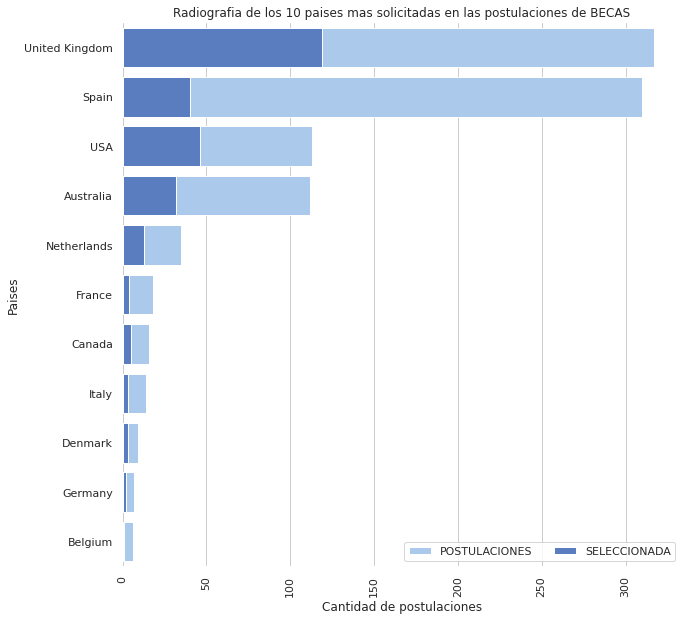

In [ ]:
def paises_populares(n):
       
       #Tabla pivot
       pivot = df_datos.pivot_table(index=['country'], values=['NO SELECCIONADA', 'SELECCIONADA'], aggfunc='sum')
       pivot['POSTULACIONES'] = pivot['NO SELECCIONADA'] +pivot['SELECCIONADA']
       pivot = pivot.sort_values(by='POSTULACIONES', ascending=False)  
       pivot['% Aceptados'] = round(pivot['SELECCIONADA']/pivot['POSTULACIONES'],3)*100
       pivot = pivot.reset_index()
       
       pivot_n = pivot[:n+1]

       #Grafico
       f, ax = plt.subplots(figsize=(10, 10))
       sns.set_color_codes("pastel")
       
       g = sns.barplot(y='country', x="POSTULACIONES", data=pivot_n,
            label="POSTULACIONES", color="b")
       
       sns.set_color_codes("muted")
       g = sns.barplot(y="country", x="SELECCIONADA", data=pivot_n,
            label="SELECCIONADA", color="b")

       
       # Agregar labels
       ax.legend(ncol=2, loc="lower right", frameon=True)
       
       plt.title('Radiografia de los {} paises mas solicitadas en las postulaciones de BECAS'.format(n))
       plt.xticks(rotation=90)
       plt.xlabel('Cantidad de postulaciones')
       plt.ylabel('Paises')
       sns.despine(left=True, bottom=True) 

paises_populares(10) 

In [ ]:
def paises_populares(n):
       
       import plotly.express as px

       #Tabla pivot
       pivot = df_datos.pivot_table(index=['country'], values=['NO SELECCIONADA', 'SELECCIONADA'], aggfunc='sum')
       pivot['POSTULACIONES'] = pivot['NO SELECCIONADA'] +pivot['SELECCIONADA']
       pivot = pivot.sort_values(by='POSTULACIONES', ascending=False)  
       pivot['% Aceptados'] = round(pivot['SELECCIONADA']/pivot['POSTULACIONES'],3)*100
       pivot = pivot.reset_index()
       
       pivot_n = pivot[:n+1]
       
       #Grafico
       df = px.data.gapminder()
       fig = px.scatter(pivot_n, x="SELECCIONADA", y="% Aceptados",
	         size='POSTULACIONES', color="country", template = 'none', color_discrete_sequence=px.colors.qualitative.G10,
                  size_max=70, title='Porcentaje de aceptacion de las {} paises con mas solicitudes a la BECAS de Magister'.format(n))
       #px.title('Nivel de Aceptacion de las {} Universidad mas solicitadas por los postulante a las Becas Chile'.format(n))
       fig.show()

paises_populares(10)

# ***Revision de Puntajes por paises y universidades***

In [ ]:
df_datos.head()

,index,FOLIO,SEXO,NOMBRE,ESTADO,INSTITUCION DE DESTINO,NO SELECCIONADA,SELECCIONADA,country,PUNTAJES_NUMERO
0,0,73200636.0,FEMENINO,DELANO BAUDET PIA ALEJANDRA,NO SELECCIONADA,BOSTON UNIVERSITY,1,0,USA,4.618
1,1,73200185.0,FEMENINO,ANDRADE SEPULVEDA KAREEN NICOLE,NO SELECCIONADA,UNIVERSIDADE DE SAO PAULO,1,0,Brazil,4.617
2,2,73200547.0,FEMENINO,PEREZ PAREDES DANIELA ALEJANDRA,NO SELECCIONADA,UNIVERSITY OF MELBOURNE,1,0,Australia,4.615
3,3,73200569.0,MASCULINO,CARMONA FONATINE PEDRO LEON,NO SELECCIONADA,UNIVERSITY OF EDINBURGH,1,0,United Kingdom,4.614
4,4,73200040.0,FEMENINO,YAÑEZ TORRES MARIA FLORENCIA,NO SELECCIONADA,UNIVERSITY OF SYDNEY,1,0,Australia,4.614


In [ ]:
def string_numero():
    cantidad = 0
    valores = []
    resultado['PUNTAJE_NUMERO'] = 0
    for i in resultado['PUNTAJE']:
       numero = ''
       numero_lista = list(i)
       for x in numero_lista:
            if x != ',':
              numero = numero + x
        
       numero = float(numero)/1000
       #print(numero)
       #resultado['PUNTAJE_NUMERO'][cantidad] = numero
       valores.append(numero)
       cantidad = cantidad + 1
    
    valores = pd.DataFrame(valores, columns =['PUNTAJES_NUMERO'])
    return valores

In [ ]:
#resultado = pd.concat([resultado, df_puntajes], axis=1, sort=False)
#resultado

#resultado = resultado.reset_index()
#resultado = pd.concat([resultado, df_puntajes], axis=1, sort=False)
#resultado.drop('PUNTAJE', inplace = True, axis = 1)
#resultado.drop('PUNTAJE_NUMERO', inplace = True, axis = 1)

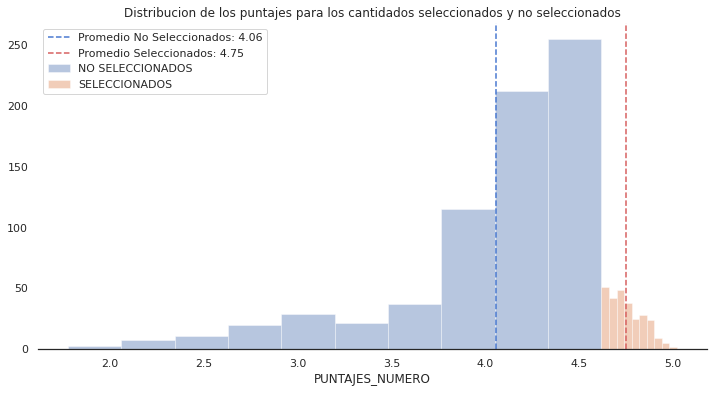

In [ ]:
def histograma_puntaje():

      plt.figure(figsize= (12,6))
      sns.set_style("white")

      #Histograma de los puntajes por seleccionados y no seleccionados
      sns.distplot(df_datos.loc[df_datos['ESTADO'] == 'NO SELECCIONADA']['PUNTAJES_NUMERO'], kde = False, bins = 10, label = 'NO SELECCIONADOS')
      sns.distplot(df_datos.loc[df_datos['ESTADO'] == 'SELECCIONADA']['PUNTAJES_NUMERO'], kde = False, bins = 10, label = 'SELECCIONADOS')
      
      #Promedio de puntaje por seleccionado y no seleccionados
      promedio_no = round(df_datos.loc[df_datos['ESTADO'] == 'NO SELECCIONADA']['PUNTAJES_NUMERO'].mean(),2)
      promedio_si = round(df_datos.loc[df_datos['ESTADO'] == 'SELECCIONADA']['PUNTAJES_NUMERO'].mean(),2)

      #Linea promedio para seleccionados y no seleccionados
      plt.axvline(x=df_datos.loc[df_datos['ESTADO'] == 'NO SELECCIONADA']['PUNTAJES_NUMERO'].mean(), color='b', linestyle='--', label = 'Promedio No Seleccionados: {}'.format(promedio_no))
      plt.axvline(x=df_datos.loc[df_datos['ESTADO'] == 'SELECCIONADA']['PUNTAJES_NUMERO'].mean(), color='r', linestyle='--', label = 'Promedio Seleccionados: {}'.format(promedio_si))

      plt.title('Distribucion de los puntajes para los cantidados seleccionados y no seleccionados')

      plt.legend()

      sns.despine(left=True,top = True,bottom = False)

histograma_puntaje()
    

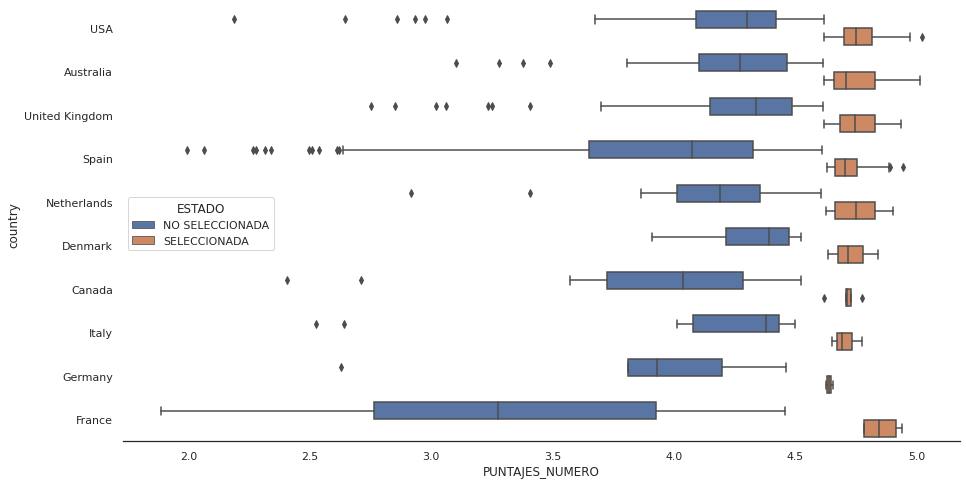

In [ ]:
paises_10 = list(df_datos.groupby('country').count()['FOLIO'].reset_index().sort_values(by='FOLIO', ascending = False)[:10]['country'])

df_datos = df_datos[df_datos['country'].isin(paises_10)]
plt.figure(figsize= (15,8))
sns.boxplot(x = 'PUNTAJES_NUMERO', y = 'country', hue = 'ESTADO', data = df_datos)
sns.despine(left=True,top = True,bottom = False)

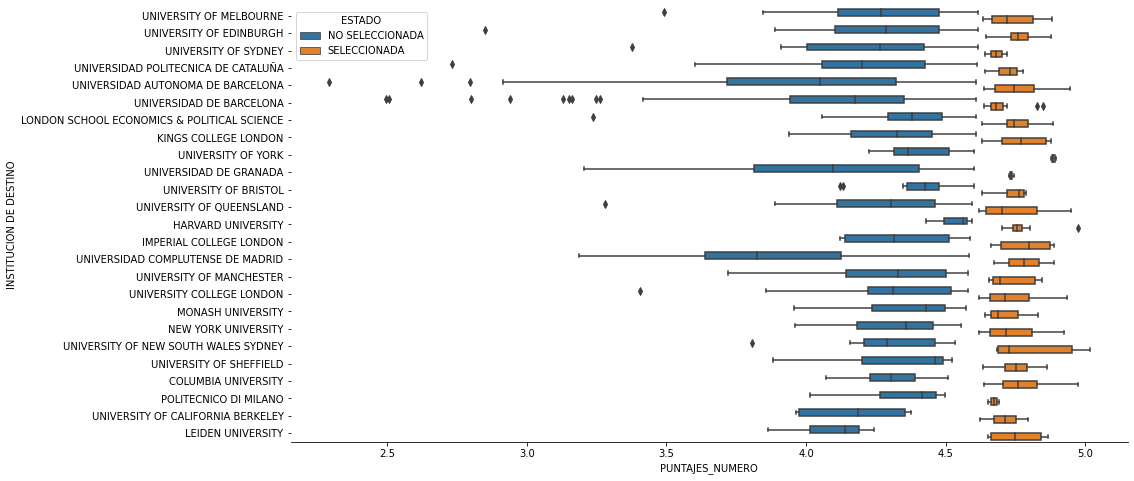

In [ ]:
def puntajes_universidades(n):

      universidad_n = list(resultado.groupby('INSTITUCION DE DESTINO').count()['FOLIO'].reset_index().sort_values('FOLIO', ascending = False)[:n+1]['INSTITUCION DE DESTINO'])
      
      resultado_n = df_datos[df_datos['INSTITUCION DE DESTINO'].isin(universidad_n)]

      plt.figure(figsize= (15,8))

      sns.boxplot(x = 'PUNTAJES_NUMERO', y = 'INSTITUCION DE DESTINO', hue = 'ESTADO', data = resultado_n)

      sns.despine(left=True,top = True,bottom = False)
      
puntajes_universidades(n)